In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:
sess = tf.InteractiveSession()

In [4]:
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]], 
                   [[7], [8], [9]]]], dtype=np.float32)

In [10]:
image.shape
# 1 image, 3 by 3 size, 1 color

(1, 3, 3, 1)

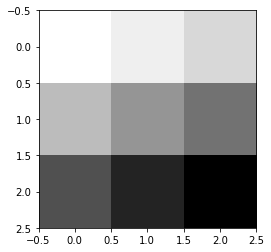

In [9]:
plt.imshow(image.reshape(3, 3), cmap="Greys")
plt.show()

In [13]:
weight = tf.constant([[[[1.]],[[1.]]], 
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
# stride: [., 1, 1, .] -> 1 x 1 stride
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)


[[ 12.  16.]
 [ 24.  28.]]


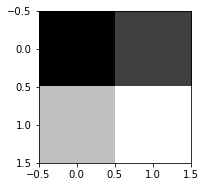

In [15]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
    plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


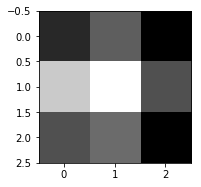

In [17]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
# padding='SAME'; 사이드 부분을 0으로 채워넣음.(제로패딩)
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

In [20]:
np.full((2, 2), 1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((2, 2), 1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([[ 1.,  1.],
       [ 1.,  1.]])

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


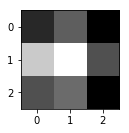

[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]


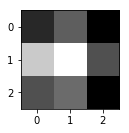

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


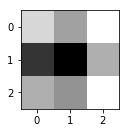

In [21]:

# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
# weight.shape (2, 2, 1, 3) (., ., ., 필터 수)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()
    # np.full((2, 2), 1) (convolution layer 1)
    # np.full((2, 2), 12) (convolution layer 2)
    # np.full((2, 2), -1) (convolution layer 3)

In [23]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
# ksize(필터 사이즈): [., 2, 2, .]) -> 2 by 2 size
# stride: [., 1, 1, .] -> 1 by 1 size
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]
